https://zhuanlan.zhihu.com/p/127379334  
https://zhuanlan.zhihu.com/p/43494643

In [3]:
import numpy as np
import pandas as pd
from datetime import datetime
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from matplotlib import pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.express as px

In [4]:
df = pd.read_csv("./data/Result.csv")
df['DATE'] = pd.to_datetime(df['DATE'])
df

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,TRANS_TIME,WEEK_NO,DATE,MEMBER
0,2375,26984851472,1,1004906,1,1.39,364,1631,1,2019-07-30,0
1,1929,27021022215,4,1004906,1,1.39,441,1755,1,2019-08-02,1
2,568,27021090189,4,1004906,1,1.39,446,35,1,2019-08-02,0
3,887,27031467254,5,1004906,1,1.39,298,1551,1,2019-08-03,0
4,175,27057508267,7,1004906,1,1.99,446,2303,2,2019-08-05,0
...,...,...,...,...,...,...,...,...,...,...,...
2551702,1598,42305362535,711,92130,1,0.99,3228,1520,102,2021-07-09,0
2551703,1598,42305362535,711,114102,1,8.89,3228,1520,102,2021-07-09,0
2551704,1598,42305362535,711,133449,1,6.99,3228,1520,102,2021-07-09,0
2551705,1598,42305362535,711,6923644,1,4.50,3228,1520,102,2021-07-09,0


### 計算客戶(household_key)單筆訂單(BASKET_ID)的購買總數量&消費總金額

In [5]:
df_1 = df[['household_key','BASKET_ID','DATE','QUANTITY','SALES_VALUE','WEEK_NO']]
df_1 = df_1.groupby(['household_key','BASKET_ID','DATE','WEEK_NO'])\
            .sum().reset_index()
df_1

,household_key,BASKET_ID,DATE,WEEK_NO,QUANTITY,SALES_VALUE
0,1,27601281299,2019-09-18,8,34,78.66
1,1,27774192959,2019-10-04,10,14,41.10
2,1,28024266849,2019-10-25,13,13,26.90
3,1,28106322445,2019-10-31,14,32,63.43
4,1,28235481967,2019-11-07,15,20,53.45
...,...,...,...,...,...,...
251439,2500,42076591137,2021-06-23,100,2,4.00
251440,2500,42115225458,2021-06-26,100,12,50.54
251441,2500,42198526427,2021-07-02,101,31,73.65
251442,2500,42229520973,2021-07-04,102,6,13.95


In [6]:
# 分別提取年月日作為單獨的一列,數據格式為datetime64，可以調用dt接口提取對應的時間
df_1['M'] = df_1.DATE.values.astype('datetime64[M]')  # 將日期格式轉為月份,datetime64
df_1['per_price'] = (df_1.SALES_VALUE/df_1.QUANTITY).map(lambda x: round(x, 2))  # 商品均價
df_1['Year'] = df_1.DATE.dt.year
df_1['Month'] = df_1.DATE.dt.month  # 提取所在的月份,int64
df_1['Day'] = df_1.DATE.dt.day
df_1['Quarter'] = df_1.DATE.dt.quarter
df_1['Weekday'] = df_1.DATE.dt.weekday
# 變更星期一=1
df_1.Weekday.replace({0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7}, inplace=True)
print(df_1.head())

   household_key    BASKET_ID       DATE  WEEK_NO  QUANTITY  SALES_VALUE  \
0              1  27601281299 2019-09-18        8        34        78.66   
1              1  27774192959 2019-10-04       10        14        41.10   
2              1  28024266849 2019-10-25       13        13        26.90   
3              1  28106322445 2019-10-31       14        32        63.43   
4              1  28235481967 2019-11-07       15        20        53.45   

           M  per_price  Year  Month  Day  Quarter  Weekday  
0 2019-09-01       2.31  2019      9   18        3        3  
1 2019-10-01       2.94  2019     10    4        4        5  
2 2019-10-01       2.07  2019     10   25        4        5  
3 2019-10-01       1.98  2019     10   31        4        4  
4 2019-11-01       2.67  2019     11    7        4        4  


```
繪圖設置
%matplotlib inline
plt.style.use('ggplot')  # 繪圖風格
cf.set_config_file(offline=True)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 加載字體包
plt.rcParams['axes.unicode_minus'] = False  # 使得負數能在坐標軸圖上顯示
```
### 如需要設置中文字體參考↓
C:\Users\Tibame_25\.conda\envs\T4_Project2\Lib\site-packages\matplotlib\mpl-data\fonts\ttf
https://blog.csdn.net/fwj_ntu/article/details/105598145


### 動態繪圖
https://plotly.com/python/plotly-express/

### 根據不同時間維度分析訂單金額是否存在異常值

In [ ]:

# fig,axes=plt.subplots(nrows=3,ncols=2)
# fig.set_size_inches(20,15)
# sns.catplot(data=df_1,kind="bar",y='SALES_VALUE',ax=axes[0][0])
# sns.catplot(data=df_1,kind="bar",x='Month',y='SALES_VALUE',ax=axes[0][1])
# sns.catplot(data=df_1,kind="bar",x='Day',y='SALES_VALUE',ax=axes[1][0])
# sns.catplot(data=df_1,kind="bar",x='Year',y='SALES_VALUE',ax=axes[1][1])
# sns.catplot(data=df_1,kind="bar",x='Quarter',y='SALES_VALUE',ax=axes[2][0])
# sns.catplot(data=df_1,kind="bar",x='Weekday',y='SALES_VALUE',ax=axes[2][1])
# plt.show()

In [ ]:
# import plotly.express as px
# fig = px.violin(df_1, y="SALES_VALUE", x="Month", box=True, points="all", hover_data=df_1.columns)
# fig.show()

In [ ]:

fig,axes=plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20,15)
sns.violinplot(data=df_1,y='SALES_VALUE',ax=axes[0][0])
sns.violinplot(data=df_1,x='Month',y='SALES_VALUE',ax=axes[0][1])
sns.violinplot(data=df_1,x='Day',y='SALES_VALUE',ax=axes[1][0])
sns.violinplot(data=df_1,x='Year',y='SALES_VALUE',ax=axes[1][1])
sns.violinplot(data=df_1,x='Quarter',y='SALES_VALUE',ax=axes[2][0])
sns.violinplot(data=df_1,x='Weekday',y='SALES_VALUE',ax=axes[2][1])

# SALES_VALUE
axes[0][0].set(ylabel='訂單金額',title='訂單金額的提琴圖')
axes[0][1].set(ylabel='月度訂單金額',title='月度訂單金額的提琴圖')
axes[1][0].set(ylabel='日度訂單金額',title='日度訂單金額的提琴圖')
axes[1][1].set(ylabel='年度訂單金額',title='年度訂單金額的提琴圖')
axes[2][0].set(ylabel='季度訂單金額',title='季度訂單金額的提琴圖')
axes[2][1].set(ylabel='週度訂單金額',title='週度訂單金額的提琴圖')
plt.show()

# fig.savefig('./output_data/'+'訂單金額'+'.png', dpi=300)

### 日新增用户量

In [ ]:
import plotly.express as px
new_user_D = df_1.groupby('household_key').min().DATE.value_counts().sort_index()
print(new_user_D.reset_index().rename(columns={"index": '時間', 'DATE': '新增用戶數量'}))

fig = px.line(new_user_D, 
             x=new_user_D.index.strftime('%Y-%m-%d'),
             y=new_user_D.values)
fig.update_layout(title="日新增用戶數量",
    xaxis_title="時間",
    yaxis_title="新增用戶數量",
    font=dict(size=18,))

# plot(fig, filename='./output_data/日新增用戶數量_line.html')

In [ ]:
import plotly.express as px
new_user_D = df_1.groupby('household_key').min().DATE.value_counts().sort_index()
print(new_user_D.reset_index().rename(columns={"index": '時間', 'DATE': '新增用戶數量'}))

fig = px.bar(new_user_D, 
             x=new_user_D.index.strftime('%Y-%m-%d'),
             y=new_user_D.values)
fig.update_layout(title="日新增用戶數量",
    xaxis_title="時間",
    yaxis_title="新增用戶數量",
    font=dict(size=18,))

# plot(fig, filename='./output_data/日新增用戶數量_bar.html')

### 計算月新增用戶
#### 月新增用戶量2019-11最多，且主要集中在前四個月，後續月份幾乎沒有新增

In [ ]:
new_user_M = df_1.groupby('household_key').min().M.value_counts().sort_index()
print(new_user_M.reset_index().rename(columns={"index": '時間', 'M': '新增用戶數量'}))

plt.figure(figsize=(10, 5))  # 設定畫布規格
sns.barplot(x=new_user_M.index.strftime('%Y-%m'),
            y=new_user_M.values)  # x為時間索引強制轉換為字符型，
plt.title('月新增用戶量')
plt.show()

In [ ]:
import plotly.express as px

new_user_M = df_1.groupby('household_key').min().M.value_counts().sort_index()
print(new_user_M.reset_index().rename(columns={"index": '時間', 'M': '新增用戶數量'}))

fig = px.bar(new_user_M, 
             x=new_user_M.index.strftime('%Y-%m'),
             y=new_user_M.values)
fig.update_layout(title="月新增用戶數量",
        xaxis_title="時間",
        yaxis_title="新增用戶數量",
        font=dict(size=18,))
# plot(fig, filename='./output_data/月新增用戶量.html')

In [ ]:
# 每日客戶數量
user_D = df_1.groupby('DATE')['household_key'].apply(
    lambda x: x.drop_duplicates().count())
# 計算新客比
new_user_pro_D = new_user_D.sort_index()/user_D

# plt.figure(figsize=(10, 8))
# new_user_pro_D.plot()
# plt.title('每日新客佔比')
# plt.show()

fig = px.line(new_user_pro_D, 
              x=new_user_pro_D.index.strftime('%Y-%m-%d'),
              y=new_user_pro_D.values)
fig.update_layout(title="每日新客佔比",
      xaxis_title="時間",
      yaxis_title="新客佔比",
      font=dict(size=18,))
# plot(fig, filename='./output_data/每日新客佔比_line.html')

In [ ]:
#計算每月的用戶數量
user_M = df_1.groupby('M')['household_key'].apply(lambda x:x.drop_duplicates().count())
new_user_pro_M = new_user_M/user_M # 月新客佔比
# print(new_user_pro_M.reset_index()\
#       .rename(columns={"index":'時間','M':'新增用戶佔比'}).fillna(0))

# plt.figure(figsize=(7,5))
# new_user_pro_M.plot()
# plt.title('每月新客佔比')
# plt.show()

fig = px.line(new_user_pro_M, 
              x=new_user_pro_M.index.strftime('%Y-%m-%d'),
              y=new_user_pro_M.values)
fig.update_layout(title="每月新客佔比",
      xaxis_title="時間",
      yaxis_title="新客佔比",
      font=dict(size=18,))

# plot(fig, filename='./output_data/每月新客佔比_line.html')

###  用戶活躍(只購買一次的用戶佔比)

In [ ]:
# 分組統計每個ID的購買次數
user_buy = df_1.groupby('household_key')['DATE'].count() 
# 購買一次的用戶數
buy_one = np.sum(user_buy.values == 1)
# 總的用戶數
user_all = user_buy.count()
buy_one_pro = buy_one/user_all
print('只購買一次的用戶佔比:%.2f' % (buy_one_pro*100), "%")

### 日、月訂單量

In [ ]:
import plotly.express as px
Count_D = df_1.groupby('DATE').household_key.count()  # 計每天的訂單量

# plt.figure(figsize=(10, 4))
# Count_D.plot()
# plt.title('每天的訂單量', fontsize=15)
# plt.xlabel('時間'
# plt.xticks(fontsize=13)
# plt.show()
           
fig = px.line(Count_D, 
        x=Count_D.index.strftime('%Y-%m-%d'),
        y=Count_D.values)
fig.update_layout(title="每天的訂單量",
      xaxis_title="日期",
      yaxis_title="訂單量",
      font=dict(size=18,))
# plot(fig, filename='./output_data/每天的訂單量_line.html')

In [ ]:
Count_M = df_1.groupby('M').household_key.count()#統計每月的訂單量

# plt.figure(figsize=(12,4))
# sns.barplot(x = Count_M.index.strftime('%Y-%m'),y = Count_M.values)
# plt.title('每月的訂單量',fontsize=15)
# plt.xticks(fontsize=13,rotation=20)
# plt.show() 

fig = px.bar(Count_M, 
        x=Count_M.index.strftime('%Y-%m'),
        y=Count_M.values,
        height=400)
fig.update_layout(title="每月的訂單量",
      xaxis_title="日期",
      yaxis_title="訂單量",
      font=dict(size=18,))
# plot(fig, filename='./output_data/每月的訂單量_.html')

### 日/月活躍用戶（DAU/MAU）

In [ ]:
every_day_count = df_1.groupby('DATE').household_key.nunique()  # 每天的活躍用戶數

# every_day_count.plot()
# plt.figure(figsize=(15, 5))
# plt.title('日活躍用戶DAU')
# plt.xlabel('時間')
# plt.show()

fig = px.line(every_day_count, 
        x=every_day_count.index.strftime('%Y-%m-%d'),
        y=every_day_count.values,
        height=400)
fig.update_layout(title="日活躍用戶DAU",
      xaxis_title="日期",
      yaxis_title="來客數",
      font=dict(size=18,))
# plot(fig, filename='./output_data/日活躍用戶DAU.html')

In [ ]:
every_M_count = df_1.groupby('M').household_key.nunique()  # 每月的活躍用戶數

# every_day_count.plot()
# plt.figure(figsize=(15, 5))
# plt.title('月活躍用戶DAU')
# plt.xlabel('時間')
# plt.show()

fig = px.line(every_M_count, 
        x=every_M_count.index.strftime('%Y-%m'),
        y=every_M_count.values,
        height=400)
fig.update_layout(title="月活躍用戶DAU",
      xaxis_title="日期",
      yaxis_title="來客數",
      font=dict(size=18,))
# plot(fig, filename='./output_data/月活躍用戶DAU.html')

In [ ]:
user_weekday = df_1[df_1['M']>'2019-11'].groupby('Weekday').household_key.nunique()  # 每月的活躍用戶數

# every_day_count.plot()
# plt.figure(figsize=(15, 5))
# plt.title('月活躍用戶DAU')
# plt.xlabel('時間')
# plt.show()

fig = px.line(user_weekday, 
        x=user_weekday.index,
        y=user_weekday.values,
        height=400)
fig.update_layout(title="周度活躍用戶量",
      yaxis_title="count",
      font=dict(size=18,))
# plot(fig, filename='./output_data/周度活躍用戶量.html')

In [ ]:
# 周高效用戶：一周之內消費3次以上
# 先groupby一次，統計每週每個ID的購買次數，再groupby一次統計每週符合要求的ID數
order_count_W = df_1.groupby(['WEEK_NO', 'household_key']).DATE.count() \
                  .reset_index().rename(columns={'DATE': 'order_count_w'})
order_eff_W = order_count_W[order_count_W.order_count_w > 2] \
    .groupby('WEEK_NO').order_count_w.count()  

# plt.figure(figsize=(16, 8))
# x = order_eff_W.index
# y = order_eff_W.values
# sns.barplot(x, y)
# plt.title('周高效用戶(單週消費2次及以上)', fontsize=20)
# plt.xlabel('時間', fontsize=20)
# plt.xticks([])
# plt.show()


fig = px.bar(order_eff_W, 
             x=order_eff_W.index,
             y=order_eff_W.values,
             color=order_eff_W.index,height=400)
fig.update_layout(title="周高效用戶(單週消費3次及以上)",
                  xaxis_title="時間",
                  yaxis_title="count",
                  font=dict(size=18,),coloraxis_showscale=False)
fig.show()
# plot(fig, filename='./output_data/周高效用戶.html', auto_open=False)

In [ ]:
print(order_count_W.sort_values("order_count_w"))

In [ ]:
df_1[(df_1.household_key==2337) ]

In [ ]:
# 月高效用戶：一個月內消費6次以上
# 先groupby一次，統計每個月每個ID的購買次數，再groupby一次統計每個月符合要求的ID數
order_count_M = df_1.groupby(['M', 'household_key']).DATE.count() \
                  .reset_index().rename(columns={'DATE': 'order_count_m'})
order_eff_M = order_count_M[order_count_M.order_count_m > 5].groupby('M').order_count_m.count()

fig = px.bar(order_eff_M, 
             x=order_eff_M.index.strftime('%Y-%m'),
             y=order_eff_M.values,height=400)
fig.update_layout(title="月高效用戶(單月消費6次及以上)",
                  xaxis_title="時間", yaxis_title="count",
                  font=dict(size=18,))
fig.show()
# plot(fig, filename='./output_data/月高效用戶(單月消費6次及以上).html', auto_open=False)

# plt.figure(figsize=(16, 8))
# x = order_eff_M.index.strftime('%Y-%m')
# y = order_eff_M.values
# sns.barplot(x, y)
# plt.title('月高效用戶(單月消費6次及以上)', fontsize=20)
# plt.xlabel('時間', fontsize=20)
# plt.xticks(fontsize=15, rotation=20)  # 橫坐標傾斜10度,避免坐標重疊
# plt.show()

## 用户留存
### 用户生命周期分布

In [ ]:
# 查找每個用戶的首購和最後一次購買的時間，相減就是生命週期
user_max_min = df_1.groupby('household_key').DATE.agg(['max', 'min'])  
user_life = (user_max_min['max']-user_max_min['min']).sort_index()
user_life = user_life/np.timedelta64(1, 'D')  # 時間相減後是時間格式，此處轉換為數值格式
bins = [-1, 0, 10, 100, 1000]  # 對用戶生命週期進行分箱[-1,0],[1,10],[11-100],[101-1000]
group_names = ['low_value', 'median_value',
               'high_value', 'important_value']  # 自定義箱體名稱
user_life2 = pd.cut(user_life, bins, labels=group_names,
                    right=True).value_counts()  # 分箱操作，統計各個箱體的個數
print(user_life2)
print(user_life.describe())

In [ ]:
fig = px.bar(user_life2, 
             x=user_life2.index,
             y=user_life2.values,height=400)
fig.update_layout(title="用戶生命週期分佈",
                  xaxis_title="用戶價值", yaxis_title="用戶數量",
                  font=dict(size=18,))
fig.show()
# plot(fig, filename='./output_data/用戶生命週期分佈.html', auto_open=False)


### 整體的留存率

In [ ]:
# 選取需要使用的DATE和household_key兩個字段，計算每次購買的時候距離首購的天數，用於統計留存率
# 留存率只考慮新用戶，所以選擇用戶首購日期作為起點
order_dt_min = df_1[['DATE', 'household_key']].groupby(
    'household_key', as_index=False).DATE.min()  # as_index=False,功能和reset_index()一樣
order_dt_new = pd.merge(left=order_dt_min, right=df[[
                        'DATE', 'household_key']], suffixes=('_min', ''), on='household_key')
order_dt_new['order_diff'] = (
    order_dt_new.DATE-order_dt_new.DATE_min)/np.timedelta64(1, 'D')  # 相減後的是天數，時間格式，轉換為數值格式

# 對間隔消費進行分箱處理
bins = [-1, 15, 30, 90, 180, 360, 540, 800]
box_names = ['15天留存', '1個月留存', '3個月留存', '半年留存', '一年留存', '一年半留存', '一年半以上']
order_dt_new['order_box'] = pd.cut(
    order_dt_new.order_diff, bins=bins, labels=box_names)
print(order_dt_new.sample(10),order_dt_new.shape,sep='\n')

def order_ratention_rate(order_dt_new=order_dt_new, first_buy_time=order_dt_new['DATE_min']):
    order_dt_new_box = order_dt_new[order_dt_new['DATE_min'] == first_buy_time].pivot_table(
        index='household_key', columns='order_box', values='DATE', aggfunc='count')
    # 根據消費情況構建特徵，消費為1，未消費為0
    order_dt_new_box_diff = order_dt_new_box.fillna(0) \
          .applymap(lambda x: 1 if x > 0 else 0)
   # 計算留存率，前面已經數值特徵化，消費的標記為1，sum將消費的總人數加起來，count全部id
    order_dt_new_box_rate = (order_dt_new_box_diff.sum()/order_dt_new_box_diff.count()) \
                       .reset_index().rename(columns={'order_box': '區間', 0: '留存率'})
    order_dt_new_box_rate['留存人數'] = order_dt_new_box_diff.sum().values
    return order_dt_new_box_rate
#計算網站整體的留存情況
print('留存率情況')
print(order_ratention_rate())

### 某日的留存率情况

In [ ]:
first_buy_time_set='20190730'
order_r_r=order_ratention_rate(first_buy_time=first_buy_time_set)

# sns.barplot(x=order_r_r.區間,y=order_r_r.留存率)
# plt.show()
print(order_r_r)
fig = px.bar(order_r_r,x=order_r_r.區間,y=order_r_r.留存率,
             hover_data=['留存人數'],height=400,
             title=first_buy_time_set+"的留存率情况")
fig.show()

plot(fig, filename='./output_data/'+first_buy_time_set+'的留存率情况.html', auto_open=False)

## 各類型用戶分類
- 未註冊 unreg
- 新用戶 new
- 活躍用戶 active
- 回流用戶 return
- 流失用戶 unactive

In [ ]:
# 每個用戶在每個時間段的購買情況
df_2=df_1[['household_key', 'DATE', 'M']]
df_2.M = df_2.M.map(lambda x: x.strftime("%Y-%m"))
order_pivot = df_2.pivot_table(
    index='household_key', columns='M', values='DATE', aggfunc='count')
# 根據消費情況構建特徵，消費為1，未消費為0
order_pivot = order_pivot.fillna(0).applymap(lambda x: 1 if x > 0 else 0)
print(order_pivot.head())

In [ ]:
def active_status(data):
    """
    定義用戶分類函數
    new新用戶，active活躍用戶，unavtive不活躍用戶，return回流用戶，unreg未註冊用戶
    """
    status = []
    for i in range(len(order_pivot.columns)):
        # 本月沒有消費
        if data[i] == 0:
            if len(status) > 0:  # 之前存在數據
                if status[i-1] == 'unreg':  # 前一個數據是未註冊，且本月未消費，所以標記為未註冊
                    status.append('unreg')
                else:  # 前一個消費過或者沒有消費，這個月沒有消費，這個月標記為不活躍
                    status.append('unactive')
            else:
                status.append('unreg')  # 本月每月消費，之前也沒有數據，本月標記為未註冊

        # 本月有消費
        else:
            if len(status) > 0:  # 之前存在數據
                if status[i-1] == 'unreg':  # 之前的標籤為未註冊，標記為新用戶
                    status.append('new')
                elif status[i-1] == 'unactive':  # 之前的標籤為不活躍，標記為回流用戶
                    status.append('return')
                else:  # 之前的標籤為活躍，回流，新用戶等標記為活躍
                    status.append('active')
            else:
                status.append('new')  # 本月有消費，之前沒有數據，標記為新用戶
    return status

purchase=order_pivot.apply(active_status,axis=1) #axis=1表示按列運算，默認是axis=0，按行運算
# purchase = pd.DataFrame(item for item in purchase)
purchase = pd.DataFrame(dict(zip(purchase.index, purchase.values))).T
purchase.columns = order_pivot.columns.values.tolist()
print(purchase.head())

In [ ]:
#未註冊用戶不統計，統計各類型用戶的數量，將數據框裝置再填充空值
purchase_count = purchase.replace('unreg',np.nan).apply(lambda x:pd.value_counts(x)).T.fillna(0)
print(purchase_count)

fig = px.bar(purchase_count)
fig.show()
plot(fig, filename='./output_data/各類型用戶的數量.html', auto_open=False)

In [ ]:
# 統計各類型用戶的佔比情況
fig = px.area(purchase_count)
fig.show()
plot(fig, filename='./output_data/各類型用戶的佔比.html', auto_open=False)

## 用戶收益

### 用戶消費總金額分佈 

In [ ]:
df_1.head(1)

In [ ]:
#用戶消費總體分析
order_groupby_user = df_1[['household_key', 'SALES_VALUE',
                         'QUANTITY']].groupby('household_key').sum()
print('用戶消費總金額統計分析')
print(order_groupby_user.SALES_VALUE.describe())
# 消費金額小於1000元的值
sum_1000 = order_groupby_user.query('SALES_VALUE<1000').SALES_VALUE
print(sum_1000)
fig = px.histogram(sum_1000)
fig.update_layout(title="用戶消費總金額分佈(千元以內)",
                  xaxis_title="用戶消費總金額", yaxis_title="人數",
                  font=dict(size=18,),showlegend=False)
fig.show()
plot(fig, filename='./output_data/用戶消費總金額分佈(千元以內).html', auto_open=False)

### 用戶消費區間分析

In [ ]:
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 27000]
group_names = ['[0:1000]','[1001:2000]','[2001:3000]','[3001:4000]','[4001:5000]','[5001:6000]'
,'[6001:7000]','[7001:8000]','[8001:9000]','[9001:10000]','[10001+]']
order_groupby_user_bins = pd.cut(order_groupby_user.SALES_VALUE, bins, labels=group_names) \
                                .value_counts().sort_index() # 對數據進行分箱
print(order_groupby_user_bins)
print('------------------')
print('平均單價：%.2f' % df_1.per_price.mean())

order_groupby_user_bins.iplot(kind='bar', bins=5, title='用戶消費總金額分佈',
                              xTitle='消費總金額區間', yTitle='人數統計',asImage=True)

fig = px.bar(order_groupby_user_bins)
fig.update_layout(title="用戶消費總金額分佈",
                  xaxis_title="消費總金額區間", yaxis_title="人數統計",
                  font=dict(size=18,),showlegend=False)
plot(fig, filename='./output_data/用戶消費總金額分佈.html', auto_open=False)

In [ ]:
print(order_groupby_user.QUANTITY.describe())

In [ ]:
#利用cufflinks繪圖庫繪製購買產品數量的區間分佈圖
bins = [0, 5, 200, 400, 600, 800, 1000, 2000, 4000 ,6000 ,8000 ,10000 ,12000,20000]
group_names = ['5', '[6-200]','[201-400]','[401-600]','[601-800]','[801-1000]','[1001-2000]',
               '[2001-4000]','[4001-6000]','[6001-8000]','[8001-10000]','[10001-12000]','[12001+]']
order_groupby_user_bins2 = pd.cut(order_groupby_user.QUANTITY,
                                  bins, labels=group_names).value_counts().sort_index()

order_groupby_user_bins2.iplot(kind='bar', title='購買商品數量區間分佈',
                               xTitle='數量區間', yTitle='人數',asImage=True)

fig = px.bar(order_groupby_user_bins2)
fig.update_layout(title="購買商品數量區間分佈",
                  xaxis_title="數量區間", yaxis_title="人數",
                  font=dict(size=18,),showlegend=False)
plot(fig, filename='./output_data/購買商品數量區間分佈.html', auto_open=False)

### 用戶累計消費佔比

In [ ]:
# 統計用戶的累計消費
order_groupby_user.sort_values(by='QUANTITY').apply(lambda x: x.cumsum()/x.sum()) \
.reset_index().QUANTITY.iplot(title='GMV描述', xTitle='累計消費用戶',
                              yTitle='累計消費佔比',asImage=True)

fig = px.line(order_groupby_user.sort_values(by='QUANTITY').apply(lambda x: x.cumsum()/x.sum()).reset_index().QUANTITY)
fig.update_layout(title="GMV描述",
                  xaxis_title="累計消費用戶", yaxis_title="累計消費佔比",
                  font=dict(size=18,),showlegend=False)
plot(fig, filename='./output_data/GMV描述.html', auto_open=False)

In [ ]:
import plotly.graph_objects as go
#整體用戶平均收益
arpu=df_1.QUANTITY.sum()/df_1.household_key.nunique()
print('整體用戶平均收益(ARPU)：%.2f ' %arpu)

#每日用戶平均收益
arpu_D=df_1.groupby('DATE').SALES_VALUE.sum()/df_1.groupby('DATE').household_key.nunique()
#每月用戶平均收益
arpu_M=df_1.groupby('M').SALES_VALUE.sum()/df_1.groupby('M').household_key.nunique()

fig = go.Figure()
fig.add_trace(go.Scatter(x=arpu_D.index, y=arpu_D.values,
                    mode='lines',
                    name='每日ARPU'))
fig.add_trace(go.Scatter(x=arpu_M.index, y=arpu_M.values,
                    mode='lines',
                    name='每月ARPU'))
fig.update_layout(
    title="ARPU趨勢圖")
fig.show()
plot(fig, filename='./output_data/ARPU趨勢圖.html', auto_open=False)

消費用戶平均收益ARPPU：Average Revenue Per Paying User

In [ ]:
#整體消費用戶平均收益
arppu=df_1.SALES_VALUE.sum()/df_1[df_1.SALES_VALUE!=0].household_key.nunique()
print('整體的ARPPU：%.2f ' %arppu)

客單價 

In [ ]:
#每筆訂單的均價
atv=df_1.SALES_VALUE.sum()/df_1.household_key.count()
print('整體客單價：%.2f ' %atv)

In [7]:
df_1.head()

,household_key,BASKET_ID,DATE,WEEK_NO,QUANTITY,SALES_VALUE,M,per_price,Year,Month,Day,Quarter,Weekday
0,1,27601281299,2019-09-18,8,34,78.66,2019-09-01,2.31,2019,9,18,3,3
1,1,27774192959,2019-10-04,10,14,41.10,2019-10-01,2.94,2019,10,4,4,5
2,1,28024266849,2019-10-25,13,13,26.90,2019-10-01,2.07,2019,10,25,4,5
3,1,28106322445,2019-10-31,14,32,63.43,2019-10-01,1.98,2019,10,31,4,4
4,1,28235481967,2019-11-07,15,20,53.45,2019-11-01,2.67,2019,11,7,4,4


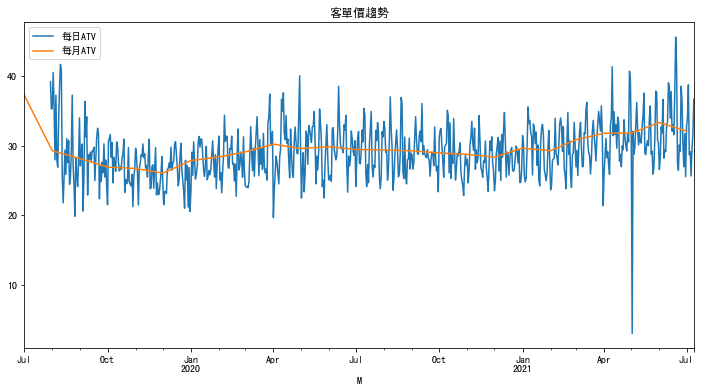

In [8]:
#客單價趨勢
atv_D=df_1.groupby('DATE').SALES_VALUE.sum()/df_1.groupby('DATE').household_key.count()
atv_M=df_1.groupby('M').SALES_VALUE.sum()/df_1.groupby('M').household_key.count()
plt.figure(figsize=(12,6))
atv_D.plot(label='每日ATV')
atv_M.plot(label='每月ATV')
plt.title('客單價趨勢')
plt.legend()
plt.show()

覆購
自定義標準如下：
1. 當天重複購買不算复購情況
2. 以購買人數比例，比如A在1、2、3號都購買了，然後算1個複購
3.  复購日期標准購買當日起的k個對方指再次購買
4. 此處不計算購買區間內的複購，例如19970101購買一次，19980202第二次購買，此時天數間隔超過365天，不計入年復購。但若以年區間來算，第一次 1997年購買時，第二次購買是1998年，應該算入年復購


In [9]:

#利用數據透視表統計每個用戶每天的購買情況
purchase_back = df_1[['household_key', 'DATE', 'SALES_VALUE']].pivot_table(
     index='household_key', columns='DATE', values='SALES_VALUE', aggfunc='count').fillna(0)
#复購情況不用考慮當天購買的許多情況，因此構成特徵，購買標籤為1，沒購買標籤為0
purchase_back = purchase_back.applymap(lambda x: 1 if x > 0 else 0)
print(purchase_back.head())

DATE           2019-07-30  2019-07-31  2019-08-01  2019-08-02  2019-08-03  \
household_key                                                               
1                       0           0           0           0           0   
2                       0           0           0           0           0   
3                       0           0           0           0           0   
4                       0           0           0           0           0   
5                       0           0           0           0           0   

DATE           2019-08-04  2019-08-05  2019-08-06  2019-08-07  2019-08-08  \
household_key                                                               
1                       0           0           0           0           0   
2                       0           0           0           0           0   
3                       0           0           0           0           0   
4                       0           0           0           0           0  

In [48]:
def repurchase(data,k=30):
    """
    計算k天內的複購情況，若距離購買日期的k天內有複購，則將該日標記為1，若沒有複購，則標記為0。
    默認計算30天的複購率
    """
    status=[]
    for i in range(len(purchase_back.columns)-k): #長度等於總天數減去複購設定天數，因為最後面的天數不足會報錯
        if data[i]==1:  #若這一天有購買
            n=0
            for q in range(k):  #統計距離該日k天內的購買天數
                n+=data[i+q]
            if n>1:    #複購區間內購買次數大於1，也就是有複購，標記為1
                status.append(1)
            else:    #複購區間內沒有複購，標記為0
                status.append(0)
        else:     #當天沒有購買，記為空值
            status.append(np.NAN)
    return status

import datetime as datetime2
k = 30  # 設定复購區間,此處可自由定義復購區間
repurchase_rate_1 = purchase_back.apply(
    lambda x: repurchase(x, k), axis=1)  # axis=1表示按列運算，默認是axis=0，按行運算
# 得到的統計結果是一個列表，轉換為Series格式，也就是將列表分列
repurchase_rate_2 = repurchase_rate_1.apply(pd.Series)  
# 計算复購率，有復購的已經標記為1，count會統計當天購買的總人數
repurchase_rate = repurchase_rate_2.sum()/repurchase_rate_2.count()

print('統計 %d 天的複購率' % k)
print(repurchase_rate.sample(5))
fig = px.line(repurchase_rate)
fig.update_layout(title="30天複購率",
                  xaxis_title="日期", yaxis_title="複購率",
                  font=dict(size=18,),showlegend=False)
fig.show()
plot(fig, filename='./output_data/30天複購率.html', auto_open=False)

統計 30 天的複購率
254    0.943574
243    0.949198
346    0.963585
622    0.961905
658    0.960912
dtype: float64


'./output_data/30天複購率.html'

用戶價值分層（RFM模型）  
R: 最近消費時間，數據較為久遠，選取所有訂單的最後時間作為當前時間分別減去每個用戶最後一筆訂單時間  
F：消費頻率，為了增加忠誠客戶的權重，定義為產品總數量  
M：消費金額，用戶消費的總金額  

In [49]:
rfm = df_1.pivot_table(index='household_key', values=['DATE', 'QUANTITY', 'SALES_VALUE'],
                     aggfunc={"DATE": 'max', 'QUANTITY': 'sum', 'SALES_VALUE': 'sum'})
# 定義R最後一次消費與統計時間的差值，此處的差值為負數，原因是後面數值標準化時，希望把時間較近的值轉化為整數
rfm['R'] = (rfm.DATE-rfm.DATE.max())/np.timedelta64(1, 'D')
rfm.drop('DATE', axis=1, inplace=True)
rfm.rename(columns={'SALES_VALUE': 'M', 'QUANTITY': 'F'}, inplace=True)
#數據歸一化,去除量綱帶來的影響，R數值大，F數值小，量綱不一樣，影響計算結果
print('數據歸一化前-----------')
print(rfm.head())
rfm=(rfm-rfm.mean())/(rfm.max()-rfm.min())  #數據歸一化公式((x-x.均值))/((x.最大值-x.最小值))
print('數據歸一化後-----------')
print(rfm.head())

數據歸一化前-----------
                  F        M     R
household_key                     
1              1995  4310.16  -5.0
2               831  1948.09 -43.0
3              1591  2633.20  -8.0
4               381  1198.62 -84.0
5               245   779.06  -8.0
數據歸一化後-----------
                      F         M         R
household_key                              
1              0.058594  0.051660  0.032617
2             -0.045390 -0.038390 -0.025222
3              0.022503 -0.012271  0.028051
4             -0.085590 -0.066962 -0.087627
5             -0.097740 -0.082957  0.028051


In [50]:
# 定義rfm標籤轉化函數
def rfm_func(data):
    level = data.apply(lambda x: '1' if x >= 0 else '0')
    label = level.R+level.F+level.M
    d = {
        '111': '重要價值客戶',
        '011': '重要喚回客戶',
        '101': '重要深耕客戶',
        '001': '重要挽留客戶',
        '110': '潛力客戶',
        '010': '一般維持客戶',
        '100': '一般價值客戶',
        '000': '流失客戶',
    }
    result = d[label]
    return result
rfm['Label'] = rfm[['R', 'F', 'M']].apply(
    rfm_func, axis=1)  # Label首字母大寫，labei會與系統的關鍵字重疊，調用的時候會報錯
print(rfm.head())

                      F         M         R   Label
household_key                                      
1              0.058594  0.051660  0.032617  重要價值客戶
2             -0.045390 -0.038390 -0.025222    流失客戶
3              0.022503 -0.012271  0.028051    潛力客戶
4             -0.085590 -0.066962 -0.087627    流失客戶
5             -0.097740 -0.082957  0.028051  一般價值客戶


一般價值客戶    1057
重要價值客戶     783
流失客戶       461
潛力客戶        95
重要深耕客戶      47
重要喚回客戶      45
一般維持客戶       7
重要挽留客戶       5
Name: Label, dtype: int64


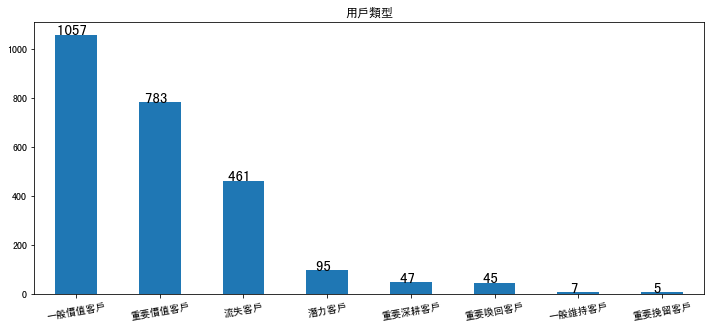

In [51]:
Label_count = rfm['Label'].value_counts()
print(Label_count)
plt.figure(figsize=(12, 5))
Label_count.plot(kind='bar',x=Label_count.index,y=Label_count.values)
plt.title('用戶類型')
for a,b in enumerate(Label_count.values):
    plt.text(a,b,'%s ' %b,ha='center',fontsize=15)
plt.xticks(rotation=10)
plt.show()

In [52]:
# RFM描述统计分析
print(rfm.describe())

                  F             M             R
count  2.500000e+03  2.500000e+03  2.500000e+03
mean  -1.048051e-17 -1.598721e-18  2.531308e-18
std    1.157174e-01  1.131682e-01  9.788609e-02
min   -1.191798e-01 -1.123462e-01 -9.597729e-01
25%   -8.273175e-02 -7.776350e-02  9.785693e-03
50%   -3.440229e-02 -3.491114e-02  3.109467e-02
75%    4.610959e-02  4.075440e-02  3.718295e-02
max    8.808202e-01  8.876538e-01  4.022709e-02


C:\Users\Tibame_25\.conda\envs\T4_Project2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 8722 missing from current font.



<Figure size 432x288 with 0 Axes>

C:\Users\Tibame_25\.conda\envs\T4_Project2\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning:

Glyph 8722 missing from current font.



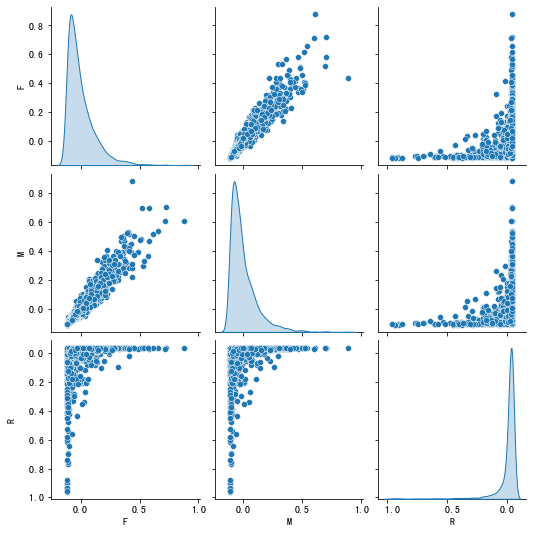

In [53]:
plt.figure()
sns.pairplot(rfm,kind='scatter',diag_kind='kde')
plt.show()

C:\Users\Tibame_25\.conda\envs\T4_Project2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 8722 missing from current font.

C:\Users\Tibame_25\.conda\envs\T4_Project2\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning:

Glyph 8722 missing from current font.



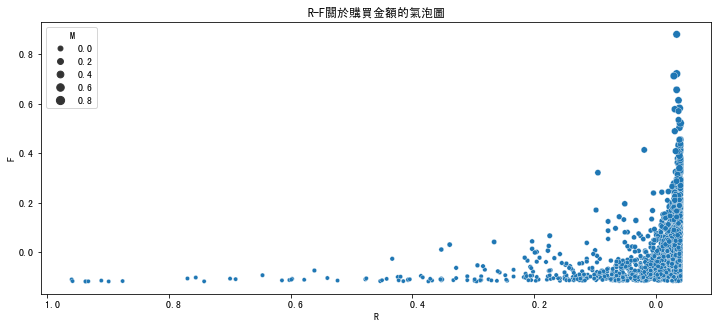

In [54]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=rfm['R'],y=rfm['F'],size=rfm['M'])
plt.title('R-F關於購買金額的氣泡圖')
plt.show()